In [1]:
import requests
import base64
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import asyncio
import aiohttp

In [2]:
files = {
    'file': ('2310.01889v4.pdf', open('../stress-test/2310.01889v4.pdf', 'rb'), 'application/pdf'),
}

r = requests.post('http://localhost:7088/doc_layout', files=files)
r = r.json()
r['stats']

{'total_page': 16,
 'infer_time_taken': 1.1284971237182617,
 'toimage_time_taken': 0.4691450595855713,
 'page_per_second': 14.178148675542861}

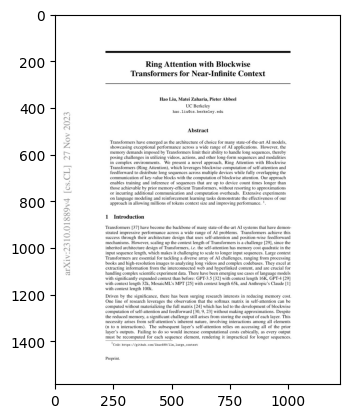

In [3]:
image_data = base64.b64decode(r['result'][0]['img'])
image = Image.open(BytesIO(image_data))
image_np = np.array(image)
plt.imshow(image_np)
plt.show()

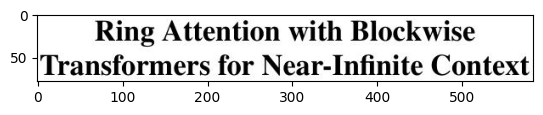

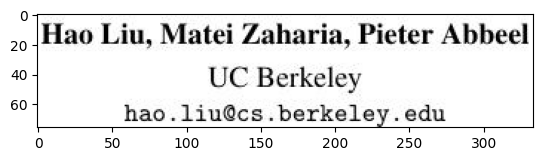

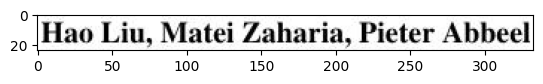

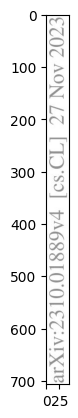

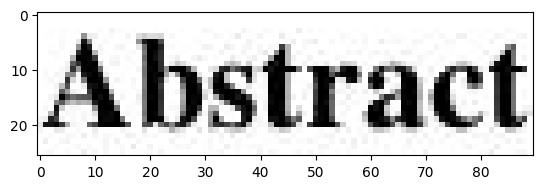

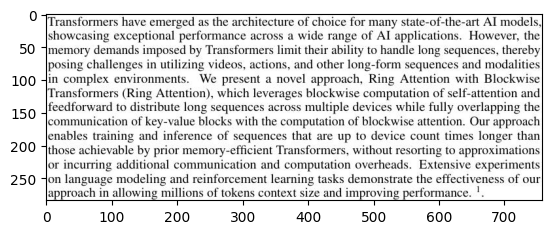

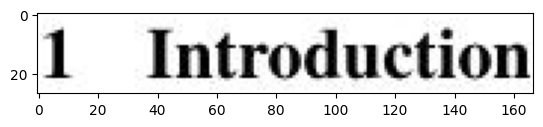

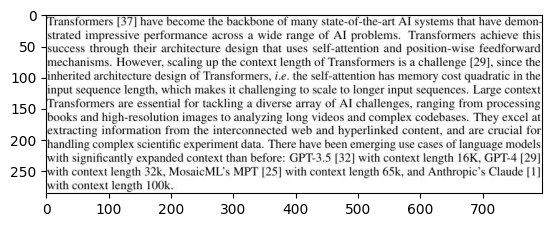

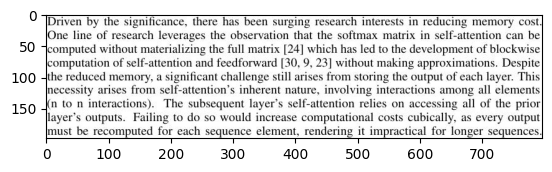

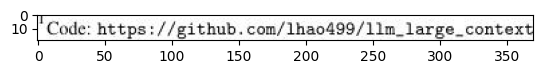

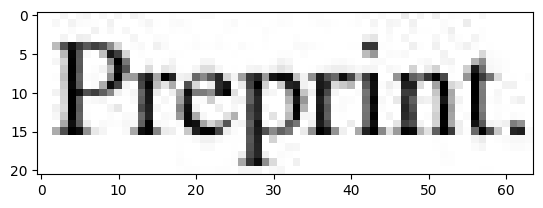

In [4]:
boxes = r['result'][0]['coordinates']
for i in range(len(boxes)):
    y_min = boxes[i]['y_min']
    y_max = boxes[i]['y_max']
    x_min = boxes[i]['x_min']
    x_max = boxes[i]['x_max']
    cropped_img = image_np[y_min:y_max, x_min:x_max]
    plt.imshow(cropped_img)
    plt.show()

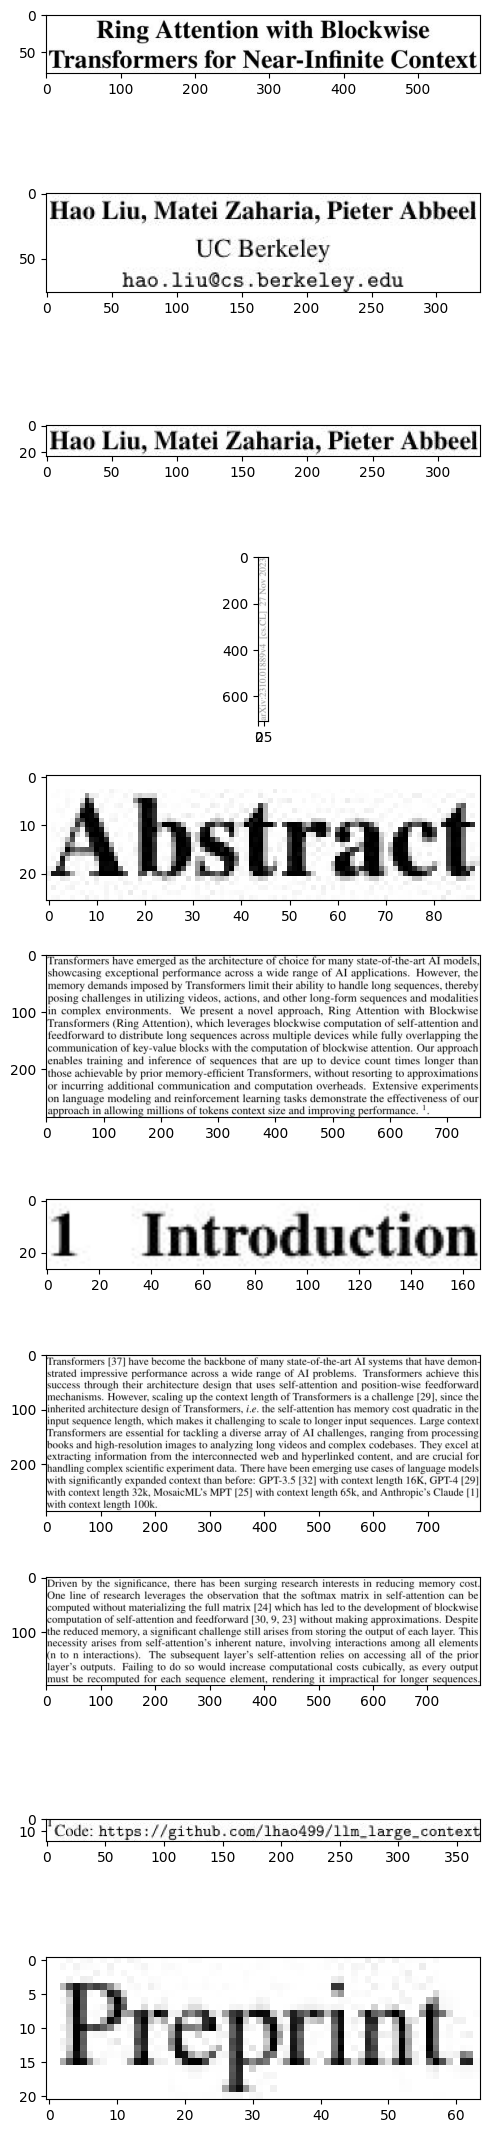

In [11]:
boxes = r['result'][0]['coordinates']

fig, axs = plt.subplots(len(boxes), 1, figsize=(5, len(boxes) * 2))

for i, box in enumerate(boxes):
    y_min, y_max = box['y_min'], box['y_max']
    x_min, x_max = box['x_min'], box['x_max']
    cropped_img = image_np[y_min:y_max, x_min:x_max]

    axs[i].imshow(cropped_img)

plt.tight_layout()
plt.show()

In [5]:
images = []
boxes = r['result'][0]['coordinates']
for i in range(len(boxes)):
    y_min = boxes[i]['y_min']
    y_max = boxes[i]['y_max']
    x_min = boxes[i]['x_min']
    x_max = boxes[i]['x_max']
    cropped_img = image_np[y_min:y_max, x_min:x_max]
    images.append(cropped_img)

In [42]:
async def to_text(image):
    image = Image.fromarray(image)
    buffer = BytesIO()
    image.save(buffer, format="PNG")
    buffer.seek(0)

    data_form = {
        'image': buffer,
    }
    async with aiohttp.ClientSession() as session:
        async with session.post(
            'http://localhost:7088/ocr',
            data=data_form,
        ) as r:
            if r.status == 200:
                r = await r.json()
                return r

In [43]:
futures = [to_text(image) for image in images]
results = await asyncio.gather(*futures)

In [44]:
results

[{'result': ' \\\\ \\(\\underline{\\text { Ring Attention with Blockwise }}\\)\n \\\\ Transformers for Near-Infinite Context\n}'},
 {'result': ' \\\\ Hao Liu, Matei Zaharia, Pieter Abbeel\n UC Berkeley\n hao.liu@cs.berkeley.edu\n}'},
 {'result': '\\text{Hao Liu, Matei Zaharia, Pieter Abbeel}'},
 {'result': '\\begin{tikzpicture}\n\\draw[thick, ->] (-5.1, 1) -- (5.5, 1);\n\\foreach \\x in {-4,6,8,10,11,12,13,14,15}\n\\draw (\\x,1.1) -- (\\x,0.1) node[below,color=red] {$\\x$};\n\\foreach \\y in {2,4}\n\\draw (0.1,\\y) -- (-0.1,\\y) node[below,color=red] {$\\y$};\n\\draw[line width=2.4pt] (0,1) -- (-5.1,1);\n\\draw[line width=2.4pt] (0,1) -- (-5.1,1);\n\\draw[line width=2.4pt] (0,1) -- (-5.1,1);\n\\end{tikzpicture}'},
 {'result': '\\text{Abstract}'},
 {'result': ' Transformers have emerged as the architecture of choice for many state-of-the-art \\(\\mathrm{AI}\\) models,\n showcasing exceptional performance across a wide range of AI applications. However, the\n memory demands imposed by Tr